In [1]:
import overcooked

In [2]:
overcooked_env = overcooked.Overcooked("CrampedRoom")

In [15]:
observation, episode_return, episode_length = overcooked_env.reset(), 0, 0
observation = overcooked_env.mdp.lossless_state_encoding(observation, debug=False)[0]

In [3]:
NORTH = (0, -1)
SOUTH = (0, 1)
EAST = (1, 0)
WEST = (-1, 0)
ALL_DIRECTIONS = INDEX_TO_DIRECTION = [NORTH, SOUTH, EAST, WEST]
DIRECTION_TO_INDEX = {a: i for i, a in enumerate(INDEX_TO_DIRECTION)}
OPPOSITE_DIRECTIONS = {NORTH: SOUTH, SOUTH: NORTH, EAST: WEST, WEST: EAST}
DIRECTION_TO_NAME = {
    d: name
    for d, name in zip(
        [NORTH, SOUTH, EAST, WEST], ["NORTH", "SOUTH", "EAST", "WEST"]
    )
}

In [4]:
import copy
import itertools

class Direction(object):
    """
    The four possible directions a player can be facing.
    """

    NORTH = (0, -1)
    SOUTH = (0, 1)
    EAST = (1, 0)
    WEST = (-1, 0)
    ALL_DIRECTIONS = INDEX_TO_DIRECTION = [NORTH, SOUTH, EAST, WEST]
    DIRECTION_TO_INDEX = {a: i for i, a in enumerate(INDEX_TO_DIRECTION)}
    OPPOSITE_DIRECTIONS = {NORTH: SOUTH, SOUTH: NORTH, EAST: WEST, WEST: EAST}
    DIRECTION_TO_NAME = {
        d: name
        for d, name in zip(
            [NORTH, SOUTH, EAST, WEST], ["NORTH", "SOUTH", "EAST", "WEST"]
        )
    }

    @staticmethod
    def get_adjacent_directions(direction):
        """Returns the directions within 90 degrees of the given direction.

        direction: One of the Directions, except not Direction.STAY.
        """
        if direction in [Direction.NORTH, Direction.SOUTH]:
            return [Direction.EAST, Direction.WEST]
        elif direction in [Direction.EAST, Direction.WEST]:
            return [Direction.NORTH, Direction.SOUTH]
        raise ValueError("Invalid direction: %s" % direction)


class Action(object):
    """
    The six actions available in the OvercookedGridworld.

    Includes definitions of the actions as well as utility functions for
    manipulating them or applying them.
    """

    STAY = (0, 0)
    INTERACT = "interact"
    ALL_ACTIONS = INDEX_TO_ACTION = Direction.INDEX_TO_DIRECTION + [
        STAY,
        INTERACT,
    ]
    INDEX_TO_ACTION_INDEX_PAIRS = [
        v for v in itertools.product(range(len(INDEX_TO_ACTION)), repeat=2)
    ]
    ACTION_TO_INDEX = {a: i for i, a in enumerate(INDEX_TO_ACTION)}
    MOTION_ACTIONS = Direction.ALL_DIRECTIONS + [STAY]
    ACTION_TO_CHAR = {
        Direction.NORTH: "↑",
        Direction.SOUTH: "↓",
        Direction.EAST: "→",
        Direction.WEST: "←",
        STAY: "stay",
        INTERACT: INTERACT,
    }
    NUM_ACTIONS = len(ALL_ACTIONS)

    @staticmethod
    def to_char(action):
        assert action in Action.ALL_ACTIONS
        return Action.ACTION_TO_CHAR[action]

    @staticmethod
    def joint_action_to_char(joint_action):
        assert all([a in Action.ALL_ACTIONS for a in joint_action])
        return tuple(Action.to_char(a) for a in joint_action)


In [5]:
action_list = [Action.INTERACT,Action.STAY,Action.INDEX_TO_ACTION[0],Action.INDEX_TO_ACTION[1],Action.INDEX_TO_ACTION[2],Action.INDEX_TO_ACTION[3]]

In [55]:
Action.INDEX_TO_ACTION[0]

(0, -1)

In [9]:
observation.shape

(5, 4, 26)

In [23]:
observation[...,2]

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [28]:
import numpy as np
agent = 0
for i in range(4):
    if agent == 0:
        offset = 0
    else:
        offset = 5
    if np.max(observation[...,agent+offset]) == 1:
              facing = i
DIRECTION_TO_NAME[INDEX_TO_DIRECTION[i]]

'WEST'

In [6]:
import anthropic
import os

os.environ["ANTHROPIC_API_KEY"] = ""

client = anthropic.Anthropic()

In [8]:
token_count = client.count_tokens("The scene is described by grid: Grid = [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']]. \
Where X represents countertop, \
P represents a pot, O represents an onion, D represents plates and S represents serving counter. ' ' represents an empty space. All of the items are on a countertop. \
The scene is 4 rows tall and 5 columns wide. \
Top row: Countertop on the left and right sides, a pot in the center. Second row: Onions on both ends , empty space in the middle three positions. Third row: \
Countertop on both ends, empty space in the middle three positions. Bottom row:	Countertop on the left, right, and in the center, plates on the left side of the center, \
serving counter on the right side of the center \
You are chef. Your aim is to serve cooked soup to the serving counter. \
To cook a soup, you first need to put 3 onions inside the pot, \
wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. You can only do one action at a time. Each movement corresponds to moving a square left, right, top or down. \
You have a partner with the same goal as you. \
Your position is describe by a grid. For example: Grid = [[0, 0, 0, 0], \
[0, 0, 1, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 0]]. \
Where '1' represents your current location. \
Output your final answer after your reasoning after the tag <action> with only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing.")
print(token_count)

403


In [10]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    # model = "claude-3-haiku-20240307",
    max_tokens=1000,
    temperature=0,
#     system="The scene is described by grid: Grid = [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']]. \
# Where X represents countertop, \
# P represents a pot, O represents an onion, D represents plates and S represents serving counter. ' ' represents an empty space. All of the items are on a countertop. \
# The scene is 4 rows tall and 5 columns wide. \
# Top row: Countertop on the left and right sides, a pot in the center. Second row: Onions on both ends , empty space in the middle three positions. Third row: \
# Countertop on both ends, empty space in the middle three positions. Bottom row:	Countertop on the left, right, and in the center, plates on the left side of the center, \
# serving counter on the right side of the center \
# You are chef. Your aim is to serve cooked soup to the serving counter. \
# To cook a soup, you first need to put 3 onions inside the pot, \
# wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. You can only do one action at a time. Each movement corresponds to moving a square left, right, top or down. \
# You have a partner with the same goal as you. \
# Your position is describe by a grid. For example: Grid = [[0, 0, 0, 0], \
# [0, 0, 1, 0], \
# [0, 0, 0, 0], \
# [0, 0, 0, 0], \
# [0, 0, 0, 0]]. \
# Where '1' represents your current location. \
# Output your final answer after your reasoning after the tag <action> with only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing.",
    system = "The scene is 4 rows tall and 5 columns wide.\nTop row:\n\nCountertop on the left and right sides\nA pot in the center\n\nSecond row:\n\nOnions on both \
ends\nEmpty space in the middle three positions\n\nThird row:\n\nCountertop on both ends\nEmpty space in the middle three positions\n\nBottom row:\n\nCountertop on the left, \
right, and in the center\nPlates on the left side of the center\nServing counter on the right side of the center\n\nYour aim is to serve cooked soup to the serving counter. \
To cook a soup, you first need to put 3 onions inside the pot, wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. \
Assuming you can only do one action at a time.\n\nYou have a partner who has the same goal as you.\n\nOutput your final answer with a tag <action> after your reasoning with \
only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing"
    messages=[
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Your current position: [[0, 0, 0, 0], \
[0, 0, 1, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 0]]. \
Your current partner's postion: [[0, 0, 0, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 0], \
[0, 1, 0, 0], \
[0, 0, 0, 0]]. \
What is your next step?"
            }
        ]
    }
]
)
print(message.content)

SyntaxError: positional argument follows keyword argument (3695904659.py, line 45)

In [7]:
print(message.content[0].text)

Let's analyze the situation:

1. My current position is in the second row, third column.
2. My partner is in the fourth row, second column.
3. To cook soup, we need to gather 3 onions and put them in the pot.
4. The onions are located in the second row, at the first and last columns.
5. The pot is in the first row, third column.

Given my current position, the most efficient next step would be to move towards the nearest onion. The closest onion is on the right side of the grid.

Therefore, my next action should be:

<action>Move right</action>

This will position me next to the onion on the right side, allowing me to interact with it in the next turn.


In [110]:
from tqdm import trange, tqdm
import concurrent.futures
import time

def process_item(m):
    message = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        # model="claude-3-haiku-20240307",
        max_tokens=1000,
        temperature=0,
#         system="The scene is described by grid: Grid = [['X', 'X', 'P', 'X', 'X']\n['O', ' ', ' ', ' ', 'O']\n['X', ' ', ' ', ' ', 'X']\n['X', 'D', 'X', 'S', 'X']]. \
# Where X represents countertop, \
# P represents a pot, O represents an onion, D represents plates and S represents serving counter. ' ' represents an empty space. All of the items are on a countertop. \
# The scene is 4 rows tall and 5 columns wide. \
# Top row: Countertop on the whole row, with a pot on the countertop in the center. Second row: Countertop on boths, with Onions on top , empty space in the middle three positions. Third row: \
# Countertop on both ends, empty space in the middle three positions. Bottom row:	Countertop on the whole row, with plates on the counter, the left side of the center, \
# serving counter on the right side of the center \
# You are chef. Your aim is to serve cooked soup to the serving counter. \
# To cook a soup, you first need to put 3 onions inside the pot, \
# wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. You can only do one action at a time. \
# You have to face the item to interact with them. Moving in a direction will force your character to face the same direction. \
# Each movement corresponds to moving a square left, right, top or down. \
# You have a partner with the same goal as you. \
# Your position is describe by a grid. For example: Grid = [[0 0 0 0 0]\n [0 0 0 0 0]\n [0 1 0 0 0]\n [0 0 0 0 0]] \
# Where '1' represents your current location. \
# Output your final answer after your reasoning after the tag <action> with only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing.",
        system = "The scene is 4 rows tall and 5 columns wide.\nTop row:\n\nCountertop on the left and right sides\nA pot in the center\n\nSecond row:\n\nOnions on both \
ends\nEmpty space in the middle three positions\n\nThird row:\n\nCountertop on both ends\nEmpty space in the middle three positions\n\nBottom row:\n\nCountertop on the left, \
right, and in the center\nPlates on the left side of the center\nServing counter on the right side of the center\n\nYour aim is to serve cooked soup to the serving counter. \
To cook a soup, you first need to put 3 onions inside the pot, wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. \
Assuming you can only do one action at a time.\n\nYou have a partner who has the same goal as you.\n\nOutput your final answer with a tag <action> after your reasoning with \
only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing",
        messages=m
    )
    return message.content

def parallel_process_with_process_pool(messages, num_workers=50):
    results = []
    with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
        future_to_item = {executor.submit(process_item, m): m for m in messages}
        for future in tqdm(concurrent.futures.as_completed(future_to_item), total=len(future_to_item), desc="Processing items"):
        # for future in concurrent.futures.as_completed(future_to_item):
            item = future_to_item[future]
            try:
                result = future.result()
                if result is not None:
                    results.append(result)
            except Exception as e:
                # pass
                print(f'Item {item} generated an exception: {e}')
    return results


In [4]:
def gabm_action(obs):
    message = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=1000,
        temperature=0,
        system="The scene is described by grid: Grid = [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']]. \
    Where X represents countertop, \
    P represents a pot, O represents an onion, D represents plates and S represents serving counter. ' ' represents an empty space. All of the items are on a countertop. \
    The scene is 4 rows tall and 5 columns wide. \
    Top row: Countertop on the left and right sides, a pot in the center. Second row: Onions on both ends , empty space in the middle three positions. Third row: \
    Countertop on both ends, empty space in the middle three positions. Bottom row:	Countertop on the left, right, and in the center, plates on the left side of the center, \
    serving counter on the right side of the center \
    You are chef. Your aim is to serve cooked soup to the serving counter. \
    To cook a soup, you first need to put 3 onions inside the pot, \
    wait for it to cook for 20 time steps, serve it on a plate and deliver it to the serving counter. You can only do one action at a time. Each movement corresponds to moving a square left, right, top or down. \
    You have a partner with the same goal as you. \
    Your position is describe by a grid. For example: Grid = [[0, 0, 0, 0]\n \
    [0, 0, 1, 0]\n \
    [0, 0, 0, 0]\n \
    [0, 0, 0, 0]\n \
    [0, 0, 0, 0]]\n \
    Where '1' represents your current location. \
    Output your final answer after your reasoning after the tag <action> with only the following options: Move left, Move right, Move up, Move down, Interact, Do nothing.",
        messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Your current position: {}. Your current partner's postion: {}.  What is your next step?".format(obs[...,0], obs[...,1])
                }
            ]
        }
    ]
    )
    action_text = message.content[0].text.split("<action>")[-1].split("</action>")[0]

    if action_text == "Move left, Move right, Move up, Move down, Interact, Do nothing."
        

SyntaxError: unexpected EOF while parsing (141587846.py, line 39)

In [24]:
import overcooked
import numpy as np
import os

In [31]:
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer

In [14]:
observation, episode_return, episode_length = overcooked_env.reset(), 0, 0
observation

In [32]:
GRID= [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']]

In [7]:
def get_action(messages):   

    prompt = 


    message={
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                }
                ]
            }

    messages.append(message)

    answers = parallel_process_with_process_pool(messages, num_workers=2)

    action = [0,0]
    for agent in range(2):
        reply = answers[agent][0].text
        action_text = reply.split("<action>")[-1].split("</action>")[0]
        if action_text == "Move left":
            action[agent] = action_list[5]
        elif action_text == "Move right":
            action[agent] = action_list[4]
        elif action_text == "Move up":
            action[agent] = action_list[2]
        elif action_text == "Move down":
            action[agent] = action_list[3]
        elif action_text == "Interact":
            action[agent] = action_list[0]
        else:
            action[agent] = action_list[1]
    
    return answers, action, messages

In [111]:
import time

start = time.time()

overcooked_env = overcooked.Overcooked("CrampedRoom")
observation, episode_return, episode_length = overcooked_env.reset(), 0, 0

sum_return = 0

hist = []

for t in tqdm(range(10)):

    log = {}
    observation_array = overcooked_env.mdp.lossless_state_encoding(observation, debug=False)[0]
    obs = np.array([observation_array]*2)

    facing_dir = [0,0]
    for agent in range(2):
        for i in range(4):
            if agent == 0:
                offset = 0
            else:
                offset = 5
            if np.max(observation_array[...,agent+offset+i]) == 1:
                    facing = i
        facing_dir[agent] = DIRECTION_TO_NAME[INDEX_TO_DIRECTION[facing]]
    facing_dir = np.array([facing_dir]*2)
    prompts = [0, 1]

    try:
        answers, action = get_action()   
    except:
        time.sleep(60)
        answers, action = get_action()
    
    log['p1'] = answers[0][0].text
    log['p2'] = answers[1][0].text 

    observation_new, reward, done, _ = overcooked_env.step(action)
    sum_return += reward

    img_directory_path = "temp"
    img_name = "frame_" + str(t) + ".jpg"
    img_path = os.path.join(img_directory_path, img_name)
    hud_data = StateVisualizer.default_hud_data(observation)
    StateVisualizer().display_rendered_state(state=observation, grid=GRID, hud_data=hud_data, img_path=img_path, ipython_display=False, window_display=False)
        
    hist.append(log)

    observation = observation_new

end = time.time()

 10%|█         | 1/10 [00:06<00:57,  6.38s/it]

Computing MotionPlanner


100%|██████████| 10/10 [00:53<00:00,  5.38s/it]


In [112]:
import json

with open("temp.json", 'w') as f:
    json.dump(hist, f)

In [104]:
observation, episode_return, episode_length = overcooked_env.reset(), 0, 0
observation_array = overcooked_env.mdp.lossless_state_encoding(observation, debug=False)[0]

In [78]:
facing_dir = [0,0]
for agent in range(2):
    for i in range(4):
        if agent == 0:
            offset = 2
        else:
            offset = 5
        if np.max(observation_array[...,agent+offset+i]) == 1:
                facing = i
                print(i)
    facing_dir[agent] = DIRECTION_TO_NAME[INDEX_TO_DIRECTION[facing]]
facing_dir = np.array([facing_dir]*2)
facing_dir

0
0


array([['NORTH', 'NORTH'],
       ['NORTH', 'NORTH']], dtype='<U5')

In [109]:
s = "{}".format(observation_array[...,0].transpose())
s

'[[0 0 0 0 0]\n [0 0 0 0 0]\n [0 1 0 0 0]\n [0 0 0 0 0]]'

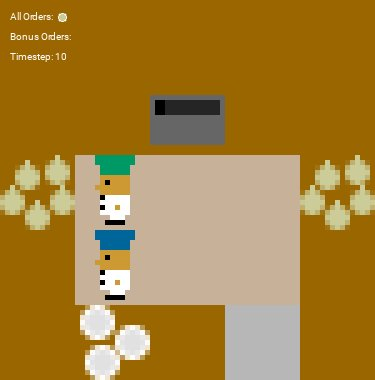

'temp/frame_9.jpg'

In [75]:
hud_data = StateVisualizer.default_hud_data(observation)
StateVisualizer().display_rendered_state(state=observation, grid=GRID, hud_data=hud_data, img_path=img_path, ipython_display=True, window_display=False)

In [85]:
observation_array[...,1].transpose()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])